In [13]:
import tensorflow as tf
a = tf.constant(2)
b = tf.constant(3)

sess = tf.InteractiveSession() 

c = tf.multiply(a,b)

<tf.Tensor 'Mul_1:0' shape=() dtype=int32>

Instructions for updating:
Use `tf.global_variables_initializer` instead.


Slope: 0.847206, B: 0.368789


Slope: 1.99883, B: 0.0302892


Slope: 2.00022, B: 0.0297584


Slope: 2.00022, B: 0.029758


Slope: 2.00022, B: 0.029758


Slope: 2.00022, B: 0.029758


Slope: 2.00022, B: 0.029758


Slope: 2.00022, B: 0.029758


Slope: 2.00022, B: 0.029758


Slope: 2.00022, B: 0.029758


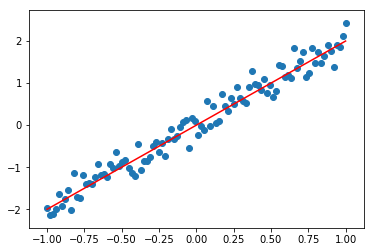

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

x_train = np.linspace(-1, 1, 100)
y_train = 2 * x_train + np.random.randn(100) * 0.25

weight = tf.Variable(0.0)
b = tf.Variable(0.0)

X = tf.placeholder("float")
Y = tf.placeholder("float")

y_model = tf.add(tf.multiply(X, weight), b)
loss = tf.square(Y - y_model)
training_op = tf.train.GradientDescentOptimizer(0.01).minimize(loss)

sess = tf.Session()
sess.run(tf.initialize_all_variables())

for i in range(100):
    for (x, y) in zip(x_train, y_train):
        sess.run(training_op, feed_dict={X: x, Y: y})
    prediction = sess.run(weight)
    # print(prediction)
    if(i % 10 == 0):
        print("Slope: " + str(weight.eval(sess)) + ", B: "+ str(b.eval(sess)))

sess.close()

y_learned = x_train * prediction

plt.plot(x_train, y_learned, 'r')
plt.scatter(x_train, y_train)
plt.show()

In [3]:
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Using TensorFlow backend.


In [7]:
# load dataset
dataframe = pandas.read_csv("housing_clean.csv", delim_whitespace=True, header=None)
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:13]
Y = dataset[:,13]

In [8]:
# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=100, batch_size=5, verbose=0)

kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Results: 57.74 (42.33) MSE
